In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
os.getcwd()

'C:\\Users\\peddi'

In [4]:
titanic=pd.read_csv('C:/Users/peddi/Desktop/.CSV files/titanic_train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
mean_age=titanic['Age'].mean()

In [58]:
titanic.shape

(891, 10)

In [12]:
titanic.Embarked.value_counts().idxmax()

'S'

In [11]:
titanic.drop('Cabin',axis=1,inplace=True)

In [10]:
titanic['Age'].fillna(mean_age,inplace=True)

In [13]:
titanic['Embarked'].fillna(titanic.Embarked.value_counts().idxmax(),inplace=True)

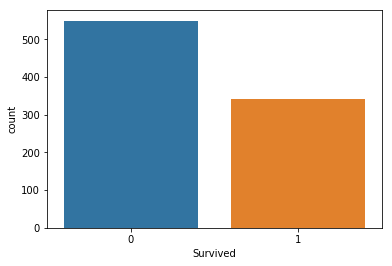

In [46]:
sns.countplot(x='Survived',data=titanic)

In [34]:
Gender=titanic.Sex.value_counts()
Gender

male      577
female    314
Name: Sex, dtype: int64

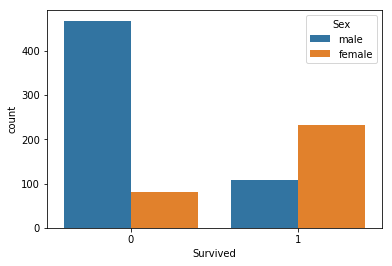

In [47]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

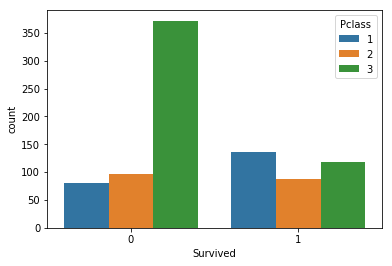

In [50]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

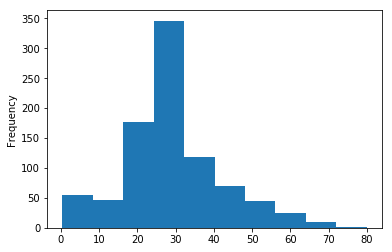

In [51]:
titanic['Age'].plot.hist()

AttributeError: Unknown property bin

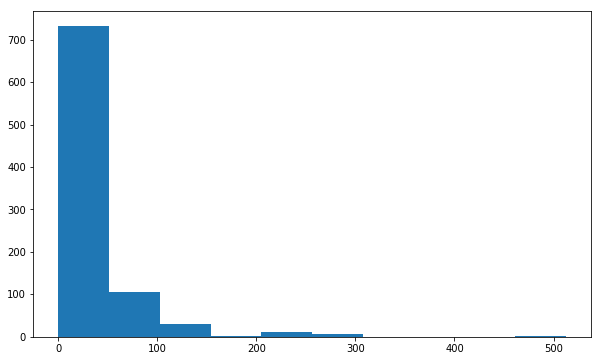

In [52]:
titanic['Fare'].plot.hist(bin=20,figsize=(10,6))

In [15]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [17]:
Pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)

In [18]:
titanic=pd.concat([titanic,sex,embarked,Pcl],axis=1)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [20]:
titanic.drop(['Name','PassengerId','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [21]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [23]:
titanic.drop('Pclass',axis=1,inplace=True)

KeyError: "['Pclass'] not found in axis"

In [24]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train and Test data

In [28]:
Y=pd.DataFrame(titanic['Survived'])

In [26]:
X=titanic.drop('Survived',axis=1)

In [27]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.30)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel=LogisticRegression()

In [34]:
logmodel.fit(X_train,Y_train)

C:\Users\peddi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\peddi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predict=logmodel.predict(X_test)

In [36]:
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
277,29.699118,0,0,0.0000,1,0,1,1,0
701,35.000000,0,0,26.2875,1,0,1,0,0
404,20.000000,0,0,8.6625,0,0,1,0,1
436,21.000000,2,2,34.3750,0,0,1,0,1
681,27.000000,0,0,76.7292,1,0,0,0,0


In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(Y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.84       165\n           1       0.79      0.63      0.70       103\n\n   micro avg       0.79      0.79      0.79       268\n   macro avg       0.79      0.76      0.77       268\nweighted avg       0.79      0.79      0.79       268\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(Y_test,predict)

array([[148,  17],
       [ 38,  65]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score 

In [51]:
accuracy_score(Y_test,predict)*100

79.47761194029852

In [60]:
pred_survived=pd.DataFrame(predict)

In [62]:
after_pred=pd.concat([pred_survived,titanic],axis=1)

In [63]:
after_pred.head()

,0,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.0,0,22.0,1,0,7.2500,1,0,1,0,1
1,0.0,1,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,1,26.0,0,0,7.9250,0,0,1,0,1
3,0.0,1,35.0,1,0,53.1000,0,0,1,0,0
4,0.0,0,35.0,0,0,8.0500,1,0,1,0,1
